<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/CNN_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


### Librerías

Verificación versión de TensorFlow

In [1]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
import numpy as np
import kagglehub
from sklearn.metrics import classification_report  #Cálculo de las métricas
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [2]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")



Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 990, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 990 (delta 239), reused 103 (delta 95), pack-reused 704 (from 2)
Receiving objects: 100% (990/990), 56.74 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (508/508), done.


In [3]:
# Descarga el dataset "rockpaperscissors" del usuario "drgfreeman" usando Kaggle Hub
# Retorna la ruta donde se guardó el dataset descargado
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

# Lista todos los archivos y directorios contenidos en la ruta de descarga
# os.listdir() devuelve una lista con los nombres de las entradas en el directorio
contenido = os.listdir(path)

# Notas importantes:
# 1. kagglehub.dataset_download() descarga el dataset en un formato específico de Kaggle
# 2. El dataset puede venir en diferentes estructuras:
#    - Como directorio con subdirectorios (rock/, paper/, scissors/)
#    - Como archivo comprimido (dataset.zip)
# 3. Si os.listdir() falla, puede ser porque:
#    - La descarga no se completó correctamente
#    - El path retornado no es un directorio directamente accesible
#    - Se necesitan permisos adicionales



100%|██████████| 306M/306M [00:01<00:00, 191MB/s]

Extracting files...


In [4]:
# Imprime el número de archivos en el directorio 'rock'
print(len(os.listdir(path + "/" + "rock")))  # Muestra cuántas imágenes de 'rock' hay disponibles

# Imprime el número de archivos en el directorio 'paper'
print(len(os.listdir(path + "/" + "paper")))  # Muestra cuántas imágenes de 'paper' hay disponibles

# Lista TODOS los archivos en el directorio 'scissors' (puede ser mucha salida)
print(os.listdir(path + "/" + "scissors"))  # Muestra los nombres de todos los archivos de 'scissors'

726
712
['8Gew5erdZ7A4K3gI.png', 'LErff4WDwhjsYG8Z.png', 'HqB3HFyK3VvZha0Y.png', 'HJ3qSJKzOvM3IwZR.png', 'GlmYygm1ezDtcUks.png', '7Zb3QM9tznboKuQE.png', '2ZPcSpOm7SEfQYwg.png', 'DgzqzxG2Zr26s93Y.png', 'RTCZxs3LhwklhSKk.png', 'Cw34q0DptQFOEeoF.png', 'OLBaBUjL8DE58OvS.png', 'vur2opqCdVFD3f6c.png', 'Qonst5LFs961D77L.png', 'wNuL3RC8AtAW70Bx.png', 'xPDNBvgWZrdijzTm.png', 'RtsIA3p963IFGi8t.png', 'fnV8zv0atHjQzfhV.png', 'z6HDaayUjgx6LnhS.png', '67sMDIYRNxuVsQQ8.png', 'tVigGbWgM7Rp9ic4.png', 'ASH8lCQK8VGgkfyG.png', 'Y2lr5d6VnNfievnA.png', 'yAEtN7WUvS5S1Cmy.png', 's9hnXT0uSjC6vl6W.png', 'TYXCfgUSBF8L7HZK.png', 'mxNMUcdf5UjHfyZQ.png', 'wQC1ZnzFaPmqMzp0.png', 'G5iYVibCVfZW27jB.png', 'Y5XFnk5x9pi67RxA.png', '7zCqi454ijCrPu6H.png', 'a8DBHodNOhJCxQrN.png', 'dOgYDnySFw6fj21T.png', 'ismjaxPJzOizyqOx.png', 'FeKk3jfdVyzHV7l5.png', 'tPxruYoQszERdzTA.png', 'p67xXnYGlchlu7pi.png', 'CjjM6i1OEFaKcm6e.png', '4burI8a7jyfTRBl6.png', 'cHA3IuTLuXm10QNQ.png', 'UDihI8vQDjvGJRjO.png', 'r2sdyTijtdmySs6h.png', 'jy6fSF

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [5]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba
num_entrena = round(num_img_clase * train_ratio)
num_prueba = round(num_img_clase * test_ratio)

# Inicializar arrays para almacenar los datos
imagenes_entrena = np.empty((num_entrena * len(clases), 200, 300, 3), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

imagenes_prueba = np.empty((num_prueba * len(clases), 200, 300, 3), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test
for clase in clases:
    # Obtener lista de todos los archivos en el directorio de la clase
    archivos = os.listdir(path + "/" + clase)

    # Seleccionar aleatoriamente 700 imágenes (sin repetición)
    archivos_seleccionados = random.sample(archivos, num_img_clase)

    # Dividir en conjuntos de entrenamiento y prueba
    archivos_train = archivos_seleccionados[:num_entrena]
    archivos_test = archivos_seleccionados[num_entrena:num_img_clase]

    # Cargar imágenes de entrenamiento
    for i, archivo in enumerate(archivos_train):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_entrena
        imagenes_entrena[indice] = np.array(imagen)
        clases_entrena[indice] = clases[clase]

    # Cargar imágenes de prueba
    for i, archivo in enumerate(archivos_test):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_prueba
        imagenes_prueba[indice] = np.array(imagen)
        clases_prueba[indice] = clases[clase]

# Verificación
print(f"Total imágenes entrenamiento: {len(imagenes_entrena)}")
print(f"Total imágenes prueba: {len(imagenes_prueba)}")
print("¡Datos cargados exitosamente!")

Total imágenes entrenamiento: 1470
Total imágenes prueba: 630
¡Datos cargados exitosamente!


# Visualización de imágenes aleatorias

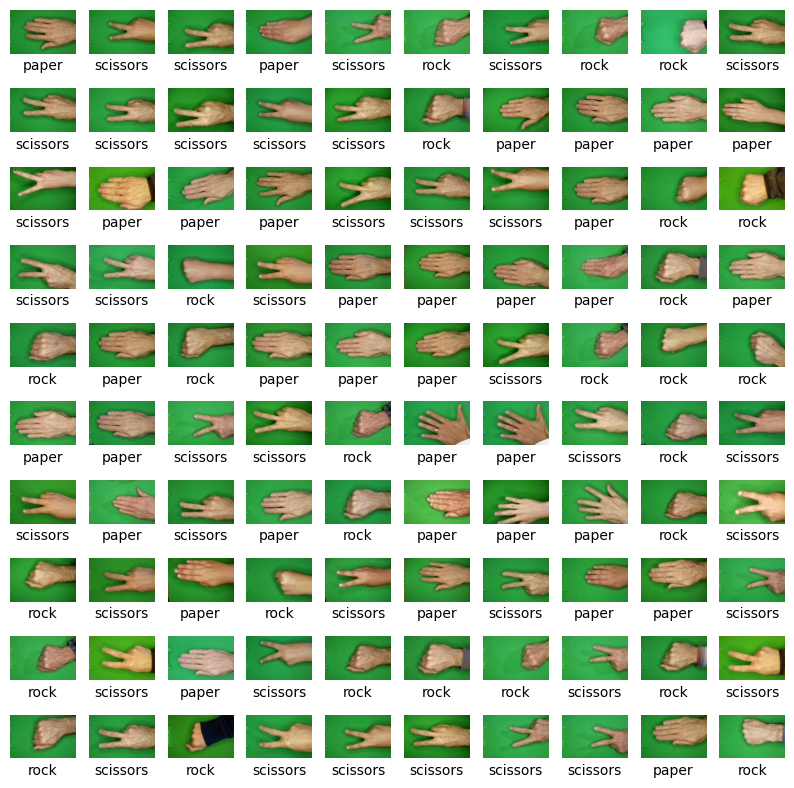

In [6]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas
plt.figure(figsize=(10, 10))

# Mostrar 100 imágenes en una cuadrícula de 10x10
for i in range(100):
    # Crear subplot en posición i+1 (comienza en 1, no en 0)
    plt.subplot(10, 10, i + 1)

    # Seleccionar un índice aleatorio dentro del rango de imágenes de entrenamiento
    indice = random.randint(0, num_entrena*len(clases) - 1)

    # Mostrar la imagen correspondiente al índice seleccionado
    # Se usa cmap="gray" para mostrar en escala de grises (aunque las imágenes son RGB)
    plt.imshow(imagenes_entrena[indice], cmap="gray")

    # Añadir etiqueta (clase) como texto en la parte inferior
    plt.xlabel(descripcion[clases_entrena[indice]])

    # Configuraciones de estilo para mejorar la visualización:
    plt.grid(False)    # Desactivar cuadrícula
    plt.box(False)     # Desactivar borde alrededor de la imagen
    plt.xticks([])     # Eliminar marcas del eje X
    plt.yticks([])     # Eliminar marcas del eje Y

# Mostrar la figura completa con todas las sub-imágenes
plt.show()

## Visualización de una sola imagen en tamaño grande

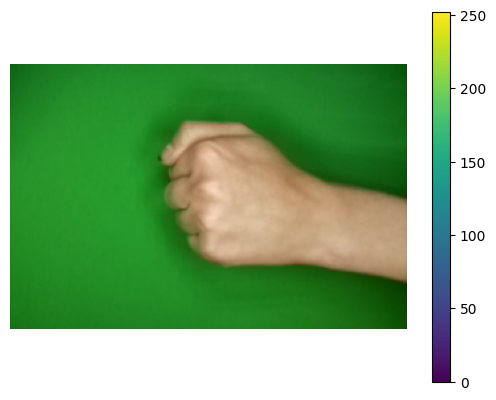

In [7]:
num_aleatorio = random.randint(0, 700)
# Crear una nueva figura de matplotlib (tamaño por defecto)
plt.figure()

# Mostrar la imagen de prueba número aleatorio del conjunto de datos
plt.imshow(imagenes_prueba[num_aleatorio])  # Muestra la imagen con mapeo de colores automático

# Añadir una barra de color (colorbar) que indica la escala de valores de píxeles
plt.colorbar()  # Útil para entender el rango de valores de intensidad en la imagen

# Configuraciones de estilo para una visualización más limpia:
plt.grid(False)    # Desactivar la cuadrícula (repetido por seguridad)
plt.box(False)     # Desactivar el borde alrededor de la imagen
plt.grid(False)    # Desactivar la cuadrícula nuevamente (redundante pero inofensivo)
plt.xticks([])     # Eliminar las marcas y etiquetas del eje X
plt.yticks([])     # Eliminar las marcas y etiquetas del eje Y

# Mostrar la figura con la imagen y la barra de color
plt.show()

In [8]:
### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Modelo CNN para Clasificación de Imágenes

In [9]:
# Definición del modelo secuencial (capas apiladas linealmente)
modelo = tf.keras.Sequential([
    # Primera capa convolucional:
    # - 32 filtros de 3x3 píxeles
    # - Función de activación ReLU (Rectified Linear Unit)
    # - Input shape: 200 (alto) x 300 (ancho) x 3 canales (RGB)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),

    # Capa de Max Pooling:
    # - Reducción dimensional con ventana de 2x2
    # - Reduce el tamaño espacial a la mitad (selecciona el valor máximo en cada ventana)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional:
    # - 64 filtros de 3x3 píxeles
    # - Función de activación ReLU
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Segunda capa de Max Pooling:
    # - Nueva reducción dimensional 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Capa Flatten:
    # - "Aplana" los mapas de características 2D a un vector 1D
    # - Prepara los datos para las capas densas (fully connected)
    tf.keras.layers.Flatten(),

    # Capa Densa (fully connected):
    # - 64 neuronas con activación ReLU
    # - Capa intermedia para aprendizaje de características complejas
    tf.keras.layers.Dense(64, activation="relu"),

    # Capa de Salida:
    # - 3 neuronas (una por cada clase: paper, rock, scissors)
    # - Sin función de activación (logits)
    tf.keras.layers.Dense(3),

    # Capa Softmax:
    # - Convierte los logits en probabilidades (suma = 1)
    # - Cada neurona representa la probabilidad de pertenecer a cada clase
    tf.keras.layers.Softmax()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Cofigurarción del Modelo para Entrenamiento

In [10]:
modelo.compile(
    # Optimizador: Descenso de Gradiente Estocástico (SGD)
    # - Algoritmo de optimización básico que actualiza los pesos en dirección opuesta al gradiente
    # - Versión por defecto sin ajuste de learning rate (puede no ser óptimo)
    optimizer="sgd",  # Equivalente a tf.keras.optimizers.SGD()

    # Función de pérdida: Sparse Categorical Crossentropy
    # - Adecuada para clasificación multi-clase con etiquetas enteras (0, 1, 2)
    # - Calcula la diferencia entre probabilidades predichas y etiquetas reales
    # - "Sparse" significa que acepta etiquetas enteras directamente (no requiere one-hot encoding)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),

    # Métrica a monitorear: Precisión (Accuracy)
    # - Porcentaje de predicciones correctas sobre el total
    # - Útil para problemas balanceados como rock-paper-scissors
    metrics=["accuracy"]
)

# Entrenamiento de la CNN

In [11]:
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
# El proceso se repite durante 10 épocas, es decir, el modelo verá todo el conjunto de datos 10 veces.
history = modelo.fit(imagenes_entrena, clases_entrena, epochs=10)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.3928 - loss: 1.1132
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6056 - loss: 0.9381
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7347 - loss: 0.7046
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8047 - loss: 0.5157
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8331 - loss: 0.4627
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8507 - loss: 0.4001
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8679 - loss: 0.3328
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8871 - loss: 0.2943
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9282 - loss: 0.2216
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9458 - loss: 0.1690


# Evaluación del modelo

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 495ms/step - accuracy: 0.9081 - loss: 0.2334
Pérdida (Loss) en el conjunto de prueba: 0.3141
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba: 0.8841269612312317
Exactitud (Accuracy) en el conjunto de prueba: 88.41%


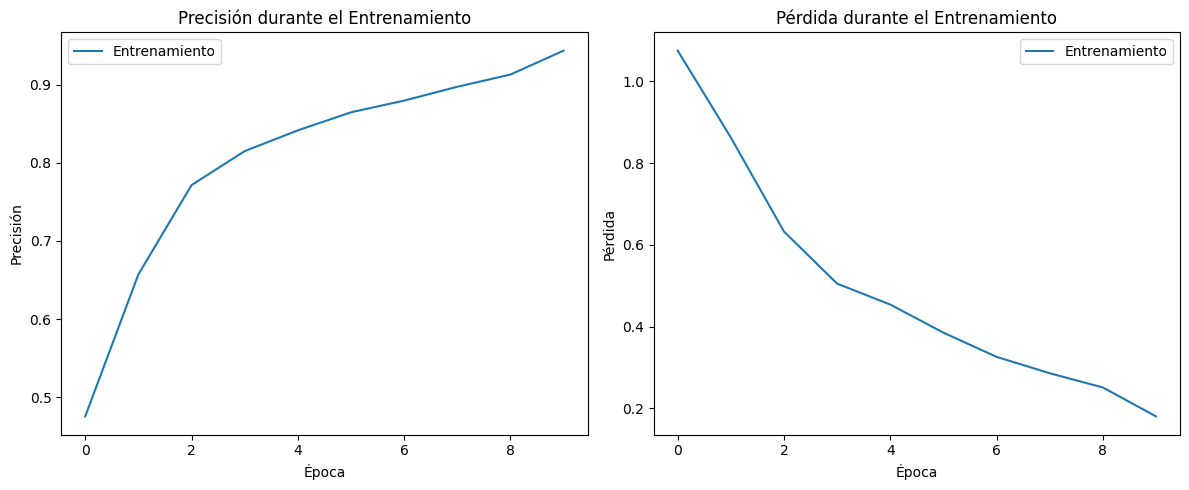

In [12]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)

# Imprime la pérdida obtenida en el conjunto de prueba
print(f"Pérdida (Loss) en el conjunto de prueba: {perdida:.4f}")

# Imprime la exactitud obtenida, que representa el porcentaje de imágenes clasificadas correctamente
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba:", exactitud)

# Imprime la exactitud como porcentaje con dos decimales
print(f"Exactitud (Accuracy) en el conjunto de prueba: {exactitud * 100:.2f}%")

# Gráficas de precisión y pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.title('Precisión durante el Entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.title('Pérdida durante el Entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()

plt.tight_layout()
plt.show()


# Clasificación de las imágenes del conjunto de entrenamiento con la CNN entrenada

In [13]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
predicciones_train = modelo.predict(imagenes_entrena)

46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 519ms/step


In [14]:
# Obtener las clases predichas (índice con mayor probabilidad para cada imagen)
clase_predicha_train = np.argmax(predicciones_train, axis=1)


Matriz de Confusión conjunto entrenamiento:
 [[462  23   5]
 [ 17 471   2]
 [ 68  21 401]]


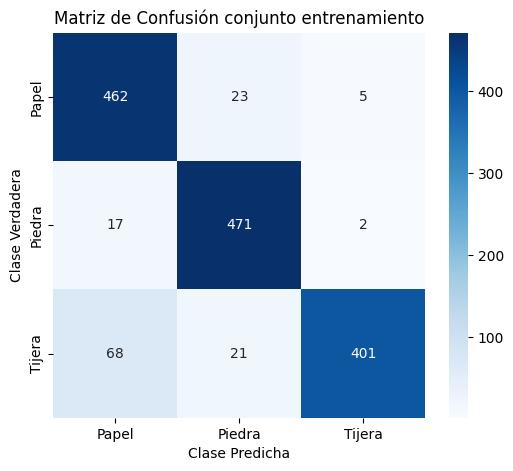


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       490
           1       0.91      0.96      0.94       490
           2       0.98      0.82      0.89       490

    accuracy                           0.91      1470
   macro avg       0.91      0.91      0.91      1470
weighted avg       0.91      0.91      0.91      1470



In [15]:
# Asignación de etiquetas numéricas para cada clase: papel = 0, piedra = 1, tijera = 2
# Genera la matriz de confusión comparando etiquetas reales del conjunto de entrenamiento (es decir, datos ya vistos) con las predichas
matriz_train = tf.math.confusion_matrix(clases_entrena, clase_predicha_train)

# Imprime la matriz de confusión como array de NumPy
print("Matriz de Confusión conjunto entrenamiento:\n", matriz_train.numpy())

# Define etiquetas de clase
etiquetas = ['Papel', 'Piedra', 'Tijera']

# Convierte la matriz de confusión a un array de NumPy (por si está en formato Tensor)
matriz_np = matriz_train.numpy()

# Configura el tamaño de la figura
plt.figure(figsize=(6, 5))

# Dibuja la matriz de confusión como un mapa de calor
sns.heatmap(matriz_np, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title("Matriz de Confusión conjunto entrenamiento")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")

# Muestra la figura
plt.show()


print("\nReporte de clasificación:")
print(classification_report(clases_entrena, clase_predicha_train))

# Clasificación de las Imágenes del conjunto de prueba con la CNN entrenada

In [16]:
# Genera predicciones del modelo para las imágenes del conjunto de prueba
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
predicciones = modelo.predict(imagenes_prueba)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 520ms/step


# Salida de la CNN para cada imagen del conjunto de prueba

In [17]:
# Obtener las clases predichas (índice con mayor probabilidad para cada imagen)
clase_predicha = np.argmax(predicciones, axis=1)


# Resultado de la evaluación: matriz de confusión:

Matriz de Confusión:
 [[189  16   5]
 [  7 203   0]
 [ 31  14 165]]


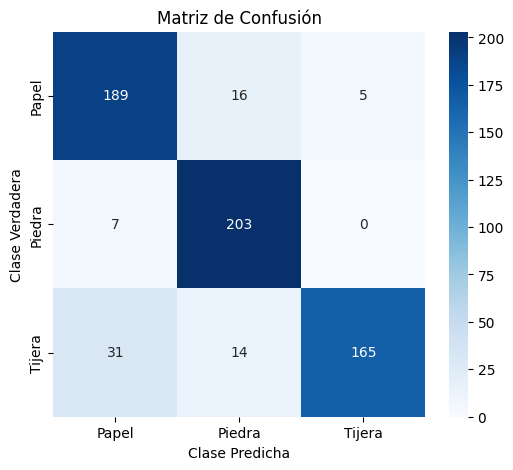


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       210
           1       0.87      0.97      0.92       210
           2       0.97      0.79      0.87       210

    accuracy                           0.88       630
   macro avg       0.89      0.88      0.88       630
weighted avg       0.89      0.88      0.88       630



In [18]:
# Asignación de etiquetas numéricas para cada clase: papel = 0, piedra = 1, tijera = 2
# Genera la matriz de confusión comparando etiquetas reales con predichas
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)

# Imprime la matriz de confusión como array de NumPy
print("Matriz de Confusión:\n", matriz.numpy())

# Define etiquetas de clase
etiquetas = ['Papel', 'Piedra', 'Tijera']

# Convierte la matriz de confusión a un array de NumPy (por si está en formato Tensor)
matriz_np = matriz.numpy()

# Configura el tamaño de la figura
plt.figure(figsize=(6, 5))

# Dibuja la matriz de confusión como un mapa de calor
sns.heatmap(matriz_np, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title("Matriz de Confusión")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")

# Muestra la figura
plt.show()

print("\nReporte de clasificación:")
print(classification_report(clases_prueba, clase_predicha))


# Actividad

Dataset: CIFAR-10
CIFAR-10 es un conjunto de datos clásico que contiene 60,000 imágenes a color de 32x32 píxeles, divididas en 10 clases (aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones). Cada clase tiene 6,000 imágenes.


Realizar la calsificación de las 10 clases utilizando CNN

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


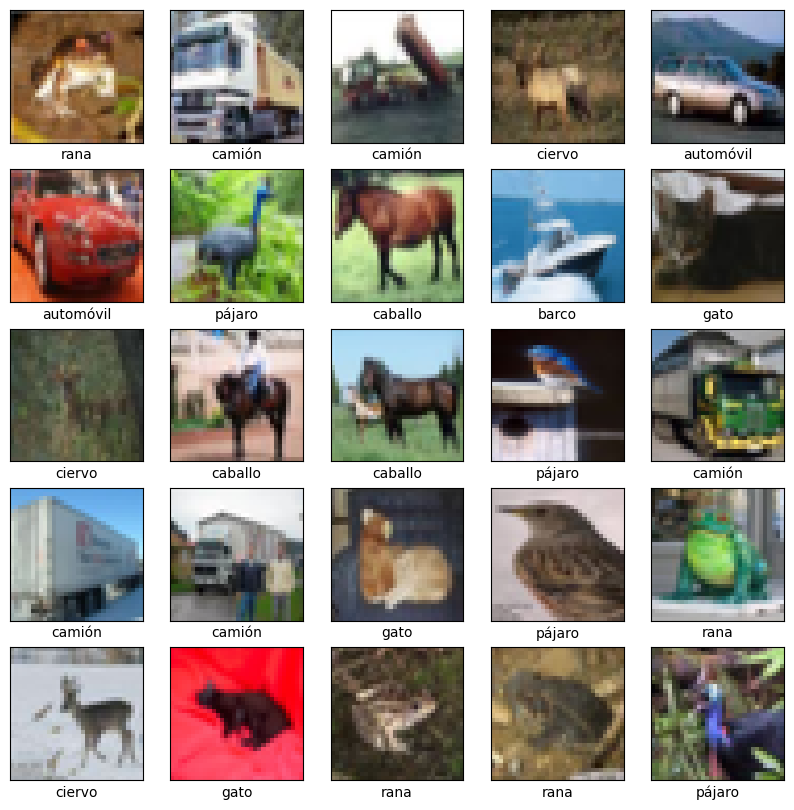

In [19]:
# Cargar el dataset CIFAR-10 de Keras
# train_images: 50000 imágenes de entrenamiento (32x32 píxeles, 3 canales RGB)
# train_labels: 50000 etiquetas (0-9) para las imágenes de entrenamiento
# test_images: 10000 imágenes de prueba
# test_labels: 10000 etiquetas para las imágenes de prueba
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalización: escalar los valores de píxeles al rango [0, 1] dividiendo por 255
# Esto ayuda a que la red neuronal converja más rápido
train_images, test_images = train_images / 255.0, test_images / 255.0

# Nombres descriptivos para cada clase (índices 0-9)
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualización de 25 imágenes del conjunto de entrenamiento con sus etiquetas
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  # Crear una cuadrícula de 5x5 subplots
    plt.xticks([])  # Eliminar marcas en eje X
    plt.yticks([])  # Eliminar marcas en eje Y
    plt.grid(False)  # Desactivar grid
    plt.imshow(train_images[i])  # Mostrar imagen
    # Mostrar etiqueta como texto (accediendo al primer elemento de train_labels[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [20]:
# Diccionario que mapea índices numéricos a nombres de clases

etiquetas_cifar10 = {
    0: 'avión',
    1: 'automóvil',
    2: 'pájaro',
    3: 'gato',
    4: 'ciervo',
    5: 'perro',
    6: 'rana',
    7: 'caballo',
    8: 'barco',
    9: 'camión'
}

In [21]:
# Construcción del modelo de red neuronal convolucional (CNN)
modelo_actividad = tf.keras.Sequential([
    # Primera capa convolucional con 32 filtros de 3x3 y activación ReLU
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Capa de Max Pooling para reducción dimensional (2x2)
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Segunda capa convolucional con 64 filtros
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Otra capa de Max Pooling
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Tercera capa convolucional
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Aplanar la salida para conectarla a capas densas
    tf.keras.layers.Flatten(),
    # Capa densa (fully connected) con 64 neuronas
    tf.keras.layers.Dense(64, activation="relu"),
    # Capa de salida con 10 neuronas (una por clase)
    tf.keras.layers.Dense(10)  # Nota: no tiene activación (logits) (se hace en la siguiente línea en la compilación)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compilación del modelo:
# - Optimizador: Adam (variante de SGD)
# - Función de pérdida: SparseCategoricalCrossentropy (para etiquetas enteras)
# - Métrica a monitorear: accuracy (precisión)
modelo_actividad.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Resumen del modelo: muestra la arquitectura y número de parámetros
modelo_actividad.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Entrenamiento del modelo:
# - train_images: imágenes de entrenamiento
# - train_labels: etiquetas de entrenamiento
# - epochs: 10 pasadas completas por el dataset
history_activiy=modelo_actividad.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.3510 - loss: 1.7410
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5636 - loss: 1.2219
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6381 - loss: 1.0328
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.6776 - loss: 0.9203
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7027 - loss: 0.8484
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.7263 - loss: 0.7827
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.7449 - loss: 0.7294
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.7607 - loss: 0.6837
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7747 - loss: 0.6387
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7908 - loss: 0.6044


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7060 - loss: 0.9091
Pérdida (Loss) en el conjunto de prueba: 0.9319
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba: 0.6972000002861023
Exactitud (Accuracy) en el conjunto de prueba: 69.72%


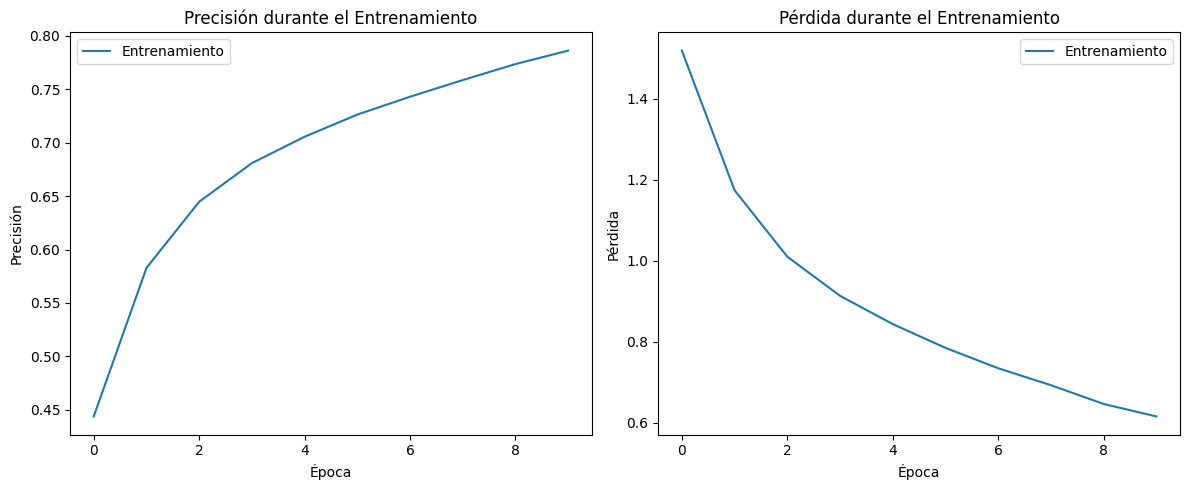

In [24]:
# Evalúa el modelo en el conjunto de prueba
perdida, exactitud = modelo_actividad.evaluate(test_images, test_labels)

print(f"Pérdida (Loss) en el conjunto de prueba: {perdida:.4f}")
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba:", exactitud)
print(f"Exactitud (Accuracy) en el conjunto de prueba: {exactitud * 100:.2f}%")

# Gráficas de precisión y pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history_activiy.history['accuracy'], label='Entrenamiento')
plt.title('Precisión durante el Entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_activiy.history['loss'], label='Entrenamiento')
plt.title('Pérdida durante el Entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Generar predicciones para el conjunto de prueba
# predicciones será un array de shape (10000, 10) con los logits para cada clase
predicciones_actividad = modelo_actividad.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


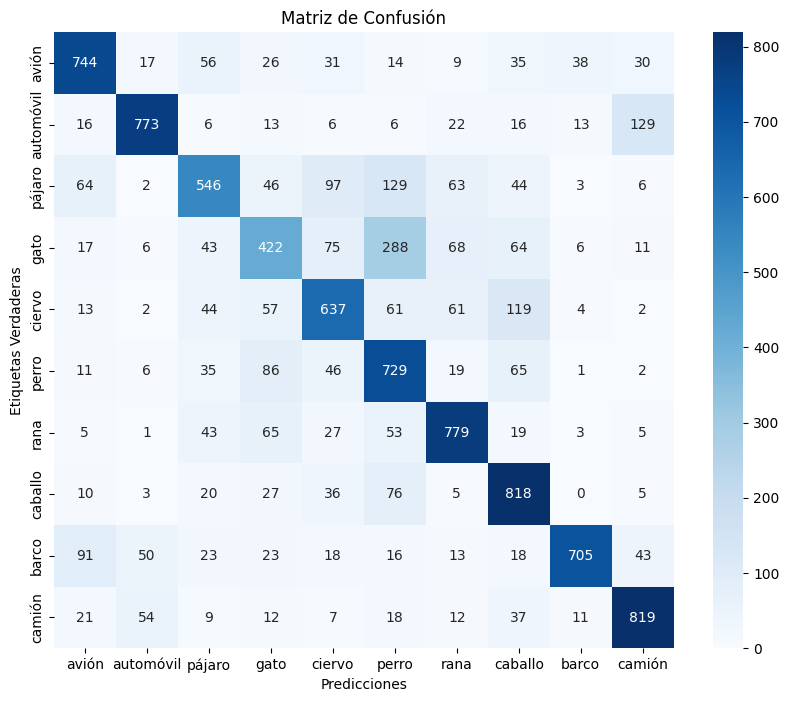


Reporte de clasificación:
              precision    recall  f1-score   support

       avión       0.75      0.74      0.75      1000
   automóvil       0.85      0.77      0.81      1000
      pájaro       0.66      0.55      0.60      1000
        gato       0.54      0.42      0.47      1000
      ciervo       0.65      0.64      0.64      1000
       perro       0.52      0.73      0.61      1000
        rana       0.74      0.78      0.76      1000
     caballo       0.66      0.82      0.73      1000
       barco       0.90      0.70      0.79      1000
      camión       0.78      0.82      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [26]:
# Obtener las clases predichas (índice con mayor probabilidad para cada imagen)
clase_predicha_actividad = np.argmax(predicciones_actividad, axis=1)

# Aplanar test_labels de (10000, 1) a (10000,) para que coincida con clase_predicha
test_labels_flat = test_labels.flatten()

# Generar matriz de confusión comparando etiquetas reales vs predichas
matriz_actividad = tf.math.confusion_matrix(test_labels_flat, clase_predicha_actividad)

# Visualización de la matriz de confusión con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_actividad.numpy(),
            annot=True,  # Mostrar valores en las celdas
            fmt="d",     # Formato decimal
            cmap="Blues",# Mapa de colores
            xticklabels=list(etiquetas_cifar10.values()),  # Nombres clases en X
            yticklabels=list(etiquetas_cifar10.values()))  # Nombres clases en Y
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

# Reporte de clasificación con métricas detalladas
print("\nReporte de clasificación:")
print(classification_report(test_labels_flat,
                          clase_predicha_actividad,
                          target_names=list(etiquetas_cifar10.values())))